In [1]:
# !pip install mediapipe

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

## KEYPOINT EXTRACTION

In [3]:
mp

<module 'mediapipe' from 'H:\\PYTHON\\PYTHON SYSTEM FILES\\Lib\\site-packages\\mediapipe\\__init__.py'>

In [4]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [5]:
mp_holistic

<module 'mediapipe.python.solutions.holistic' from 'H:\\PYTHON\\PYTHON SYSTEM FILES\\Lib\\site-packages\\mediapipe\\python\\solutions\\holistic.py'>

In [6]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [7]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [8]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [9]:
cap = cv2.VideoCapture("J:/AUTISM DETECTION PROJECT/3DCNN/videos/fear/fear20.mp4")
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

KeyboardInterrupt: 

In [ ]:
# frame

In [ ]:
# from PIL import Image
# import numpy as np

# # Open the image using Pillow (PIL)
# image_path = "20.jpg"
# image = Image.open(image_path)

# # Convert the image to a NumPy array
# image_array = np.array(image)

In [ ]:
# image_array

In [10]:
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    image, results = mediapipe_detection(frame, holistic)

    draw_landmarks(frame, results)

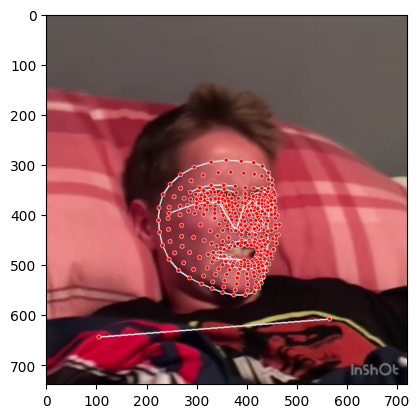

In [11]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [12]:
len(results.face_landmarks.landmark)

468

In [13]:
results.pose_landmarks.landmark

[x: 0.5250092
y: 0.58608985
z: -1.6303818
visibility: 0.99271
, x: 0.5515375
y: 0.51189494
z: -1.5108545
visibility: 0.9882615
, x: 0.57107013
y: 0.5121672
z: -1.5115365
visibility: 0.98824257
, x: 0.5897318
y: 0.5118053
z: -1.5123974
visibility: 0.9872148
, x: 0.47888106
y: 0.5094135
z: -1.5417142
visibility: 0.9901951
, x: 0.44814458
y: 0.50980675
z: -1.5410405
visibility: 0.991748
, x: 0.41690633
y: 0.5108913
z: -1.5418947
visibility: 0.99263847
, x: 0.59941125
y: 0.53359973
z: -0.75004774
visibility: 0.9902574
, x: 0.3413568
y: 0.53872395
z: -0.83624065
visibility: 0.99543226
, x: 0.5499145
y: 0.6646694
z: -1.3373749
visibility: 0.9927751
, x: 0.46406093
y: 0.6597271
z: -1.3626933
visibility: 0.99497247
, x: 0.7850767
y: 0.8248698
z: -0.22409445
visibility: 0.98578775
, x: 0.14600426
y: 0.87276685
z: -0.5181558
visibility: 0.98069453
, x: 1.0985887
y: 1.1209342
z: -0.2548578
visibility: 0.16458496
, x: -0.09321999
y: 1.3351767
z: -0.7596235
visibility: 0.4138253
, x: 0.9537506
y: 1

In [14]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [15]:
pose

[array([ 0.52500921,  0.58608985, -1.63038182,  0.99270999]),
 array([ 0.55153751,  0.51189494, -1.51085448,  0.98826152]),
 array([ 0.57107013,  0.51216722, -1.51153648,  0.98824257]),
 array([ 0.58973181,  0.5118053 , -1.51239741,  0.9872148 ]),
 array([ 0.47888106,  0.50941348, -1.54171419,  0.9901951 ]),
 array([ 0.44814458,  0.50980675, -1.54104054,  0.99174798]),
 array([ 0.41690633,  0.51089132, -1.54189467,  0.99263847]),
 array([ 0.59941125,  0.53359973, -0.75004774,  0.99025738]),
 array([ 0.34135681,  0.53872395, -0.83624065,  0.99543226]),
 array([ 0.54991448,  0.66466939, -1.33737493,  0.99277508]),
 array([ 0.46406093,  0.6597271 , -1.36269331,  0.99497247]),
 array([ 0.78507668,  0.82486981, -0.22409445,  0.98578775]),
 array([ 0.14600426,  0.87276685, -0.51815581,  0.98069453]),
 array([ 1.09858871,  1.12093425, -0.25485781,  0.16458496]),
 array([-0.09321999,  1.33517671, -0.75962353,  0.4138253 ]),
 array([ 0.95375061,  1.30210114, -0.87462401,  0.07119508]),
 array([

In [16]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [17]:
len(face)

1404

In [18]:
lh,rh

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [19]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [20]:
face

array([ 0.56379157,  0.61205018, -0.0433084 , ...,  0.62247199,
        0.50423294,  0.07046465])

In [21]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])


In [22]:
result_test = extract_keypoints(results)

In [23]:
result_test

array([ 0.52500921,  0.58608985, -1.63038182, ...,  0.        ,
        0.        ,  0.        ])

In [24]:
468*3+33*4+21*3+21*3

1662

In [25]:
len(result_test)

1662

In [26]:
np.save('0', result_test)

In [27]:
np.load('0.npy')

array([ 0.52500921,  0.58608985, -1.63038182, ...,  0.        ,
        0.        ,  0.        ])

## DATA ARRANGEMENT

In [28]:
# !pip install moviepy

In [29]:
DATA_PATH = os.path.join('data2') 

# Actions that we try to detect
actions = np.array(['happy','sad','anger','surprise','fear','neutral'])
actions.sort()

# Thirty videos worth of data
no_sequences = 62

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

In [30]:
os.makedirs('data/', exist_ok=True)

# Create subdirectories for each action
for action in actions:
    action_directory = os.path.join('data', action)
    os.makedirs(action_directory, exist_ok=True)

In [31]:
# import cv2
# import os

# # Video file path
# video_path = 'J:/AUTISM DETECTION PROJECT/3DCNN/videos/neutral/neutral13.mp4'

# # Create a directory to save frames
# output_directory = 'data2/neutral'
# os.makedirs(output_directory, exist_ok=True)

# # Open the video file
# cap = cv2.VideoCapture(video_path)

# frame_count = 0
# folder_count = 55
# frame_per_folder = 30
# fps = int(cap.get(cv2.CAP_PROP_FPS))

# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

#     while cap.isOpened():
#         ret, frame = cap.read()
        
#         if not ret:
#             break

#         image, results = mediapipe_detection(frame, holistic)

#                 # Draw landmarks
#         draw_styled_landmarks(image, results)
    
        
    
#         if frame_count % frame_per_folder == 0:
#             current_folder = os.path.join(output_directory, f'{folder_count}')
#             os.makedirs(current_folder, exist_ok=True)
#             folder_count += 1

#         keypoints = extract_keypoints(results)
#         frame_name = os.path.join(current_folder, f'{frame_count % frame_per_folder}.npy')
        
#         np.save(frame_name, keypoints)
    
#         frame_count += 1
    
#         if frame_count >= frame_per_folder * folder_count:
#             break
    
#     # Release the video capture object
# cap.release()

# # Close all OpenCV windows (if any were opened)
# cv2.destroyAllWindows()


## Preprocess Data and Create Labels and Features

In [32]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [33]:
label_map = {label:num for num, label in enumerate(actions)}

In [34]:
label_map

{'anger': 0, 'fear': 1, 'happy': 2, 'neutral': 3, 'sad': 4, 'surprise': 5}

In [35]:
DATA_PATH

'data2'

In [36]:
# import os

# # Define the base directory
# base_directory = 'data2'

# # Iterate through the subdirectories in the base directory
# for root, dirs, files in os.walk(base_directory):
#     for subdir in dirs:
#         # Create the full path to the subdirectory
#         subdir_path = os.path.join(root, subdir)
#         # Use os.listdir to get the list of files in the subdirectory and count them
#         file_count = len(os.listdir(subdir_path))
#         if(file_count > 30):
#             print(f"Number of files in '{subdir_path}': {file_count}")


In [37]:
# import os

# # Define the path to the main directory containing the emotion categories (e.g., 'happy', 'sad', etc.)
# main_dir = 'data2/'

# # Loop through the emotion categories
# for emotion_category in os.listdir(main_dir):
#     category_path = os.path.join(main_dir, emotion_category)
    
#     # Check if it's a directory
#     if os.path.isdir(category_path):
#         # Get a list of subdirectories
#         subdirectories = os.listdir(category_path)
        
#         # Sort the subdirectories numerically
#         subdirectories.sort(key=lambda x: int(x))
        
#         # Rename the subdirectories from '1' to 'n'
#         for i, subdirectory in enumerate(subdirectories, start=1):
#             old_subdirectory_path = os.path.join(category_path, subdirectory)
#             new_subdirectory_path = os.path.join(category_path, str(i))
#             os.rename(old_subdirectory_path, new_subdirectory_path)
#             # print(old_subdirectory_path,new_subdirectory_path)


In [38]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [39]:
np.array(sequences).shape

(372, 30, 1662)

In [40]:
np.array(labels).shape

(372,)

In [41]:
X = np.array(sequences)

In [42]:
X.shape

(372, 30, 1662)

In [43]:
y = to_categorical(labels).astype(int)

In [44]:
y

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1]])

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [46]:
y_test.shape

(19, 6)

## Build Network

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [48]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [49]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [50]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [51]:
model.fit(X_train, y_train, epochs=250, callbacks=[tb_callback])

Epoch 1/250
12/12 [==============================] - 14s 124ms/step - loss: 2.3128 - categorical_accuracy: 0.1728
Epoch 2/250
12/12 [==============================] - 2s 129ms/step - loss: 2.3303 - categorical_accuracy: 0.1785
Epoch 3/250
12/12 [==============================] - 2s 151ms/step - loss: 1.7588 - categorical_accuracy: 0.1983
Epoch 4/250
12/12 [==============================] - 2s 130ms/step - loss: 1.8153 - categorical_accuracy: 0.2040
Epoch 5/250
12/12 [==============================] - 2s 167ms/step - loss: 1.7814 - categorical_accuracy: 0.1926
Epoch 6/250
12/12 [==============================] - 2s 128ms/step - loss: 1.7765 - categorical_accuracy: 0.2323
Epoch 7/250
12/12 [==============================] - 2s 140ms/step - loss: 1.7130 - categorical_accuracy: 0.2663
Epoch 8/250
12/12 [==============================] - 2s 136ms/step - loss: 1.6329 - categorical_accuracy: 0.2748
Epoch 9/250
12/12 [==============================] - 2s 153ms/step - loss: 1.6139 - categorical

In [52]:
res = model.predict(X_test)

1/1 [==============================] - 1s 991ms/step


In [53]:
X_test

array([[[ 5.83323419e-01,  6.40502512e-01, -2.52582431e+00, ...,
          4.60961401e-01,  5.83653271e-01, -4.41887453e-02],
        [ 5.82686901e-01,  6.40475333e-01, -2.63886142e+00, ...,
          4.52089429e-01,  5.97304761e-01, -3.98665108e-02],
        [ 5.77584684e-01,  6.40325904e-01, -2.56176066e+00, ...,
          4.44364399e-01,  5.91180801e-01, -4.48627360e-02],
        ...,
        [ 5.28773367e-01,  6.59162402e-01, -1.80477405e+00, ...,
          3.77436996e-01,  6.00799918e-01, -2.88202967e-02],
        [ 5.21227181e-01,  6.62699401e-01, -1.60891306e+00, ...,
          3.72075766e-01,  5.99883139e-01, -3.12260501e-02],
        [ 5.11923611e-01,  6.63655579e-01, -1.63246024e+00, ...,
          3.65583956e-01,  6.00060821e-01, -2.91007832e-02]],

       [[ 4.65146065e-01,  6.79514706e-01, -1.14846623e+00, ...,
          3.52631748e-01,  2.75999308e-01,  6.48785233e-02],
        [ 4.64925945e-01,  6.79656327e-01, -1.16058552e+00, ...,
          3.51365775e-01,  3.10929000e

In [54]:
res

array([[5.1338926e-02, 1.2838100e-01, 3.5653487e-01, 1.9138212e-03,
        1.6253251e-01, 2.9929885e-01],
       [2.7238250e-06, 4.7536534e-01, 1.2853604e-07, 2.8205934e-06,
        5.2461392e-01, 1.5092317e-05],
       [5.6296808e-06, 4.6589670e-01, 2.9337559e-07, 5.6417034e-06,
        5.3406560e-01, 2.6103422e-05],
       [5.5027835e-02, 9.1460355e-02, 3.9592573e-01, 2.5313424e-03,
        1.3902883e-01, 3.1602594e-01],
       [1.8873861e-03, 4.8413220e-01, 3.0113899e-03, 2.8303594e-04,
        4.8777285e-01, 2.2913128e-02],
       [1.3064769e-01, 8.7110959e-03, 4.1863951e-01, 2.1498090e-02,
        3.2756444e-02, 3.8774711e-01],
       [5.2075908e-02, 1.1786715e-01, 3.6789408e-01, 1.9811033e-03,
        1.5612549e-01, 3.0405632e-01],
       [2.8607391e-02, 3.8546443e-01, 2.0666066e-01, 8.1487442e-04,
        2.1050048e-01, 1.6795218e-01],
       [5.7676189e-06, 7.5764531e-01, 2.9880437e-06, 2.8711614e-07,
        2.4227764e-01, 6.7988178e-05],
       [5.3000662e-07, 5.4848182e-01,

In [55]:
actions[np.argmax(res[4])]

'sad'

In [56]:
actions[np.argmax(y_test[4])]

'fear'

In [57]:
model.save('action.h5')

H:\PYTHON\PYTHON SYSTEM FILES\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [58]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [59]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 66ms/step


In [60]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [61]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[16,  2],
        [ 1,  0]],

       [[10,  3],
        [ 3,  3]],

       [[13,  3],
        [ 0,  3]],

       [[16,  0],
        [ 2,  1]],

       [[11,  3],
        [ 4,  1]],

       [[18,  0],
        [ 1,  0]]], dtype=int64)

In [62]:
accuracy_score(ytrue, yhat)

0.42105263157894735

In [63]:
for num, prob in enumerate(res):
    print(num,prob)

0 [0.05133893 0.128381   0.35653487 0.00191382 0.16253251 0.29929885]
1 [2.7238250e-06 4.7536534e-01 1.2853604e-07 2.8205934e-06 5.2461392e-01
 1.5092317e-05]
2 [5.6296808e-06 4.6589670e-01 2.9337559e-07 5.6417034e-06 5.3406560e-01
 2.6103422e-05]
3 [0.05502784 0.09146035 0.39592573 0.00253134 0.13902883 0.31602594]
4 [1.8873861e-03 4.8413220e-01 3.0113899e-03 2.8303594e-04 4.8777285e-01
 2.2913128e-02]
5 [0.13064769 0.0087111  0.4186395  0.02149809 0.03275644 0.3877471 ]
6 [0.05207591 0.11786715 0.36789408 0.0019811  0.15612549 0.30405632]
7 [0.02860739 0.38546443 0.20666066 0.00081487 0.21050048 0.16795218]
8 [5.7676189e-06 7.5764531e-01 2.9880437e-06 2.8711614e-07 2.4227764e-01
 6.7988178e-05]
9 [5.3000662e-07 5.4848182e-01 4.0255765e-07 1.2884048e-07 4.5146710e-01
 5.0067825e-05]
10 [2.8130750e-04 5.0706220e-01 4.7819147e-05 2.7943967e-04 4.9132085e-01
 1.0084438e-03]
11 [0.05470708 0.05780979 0.43997523 0.00300848 0.11075048 0.3337489 ]
12 [5.5582601e-01 1.9354096e-05 1.6142903e-0

In [64]:
from scipy import stats

In [65]:
colors = [(245, 117, 16), (117, 245, 16), (16, 117, 245), (255, 0, 0), (0, 255, 0), (0, 0, 255)]

def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0, 60 + num * 40), (int(prob * 100), 90 + num * 40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85 + num * 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    return output_frame


In [66]:
# prob_viz(res[0], actions, image, colors)

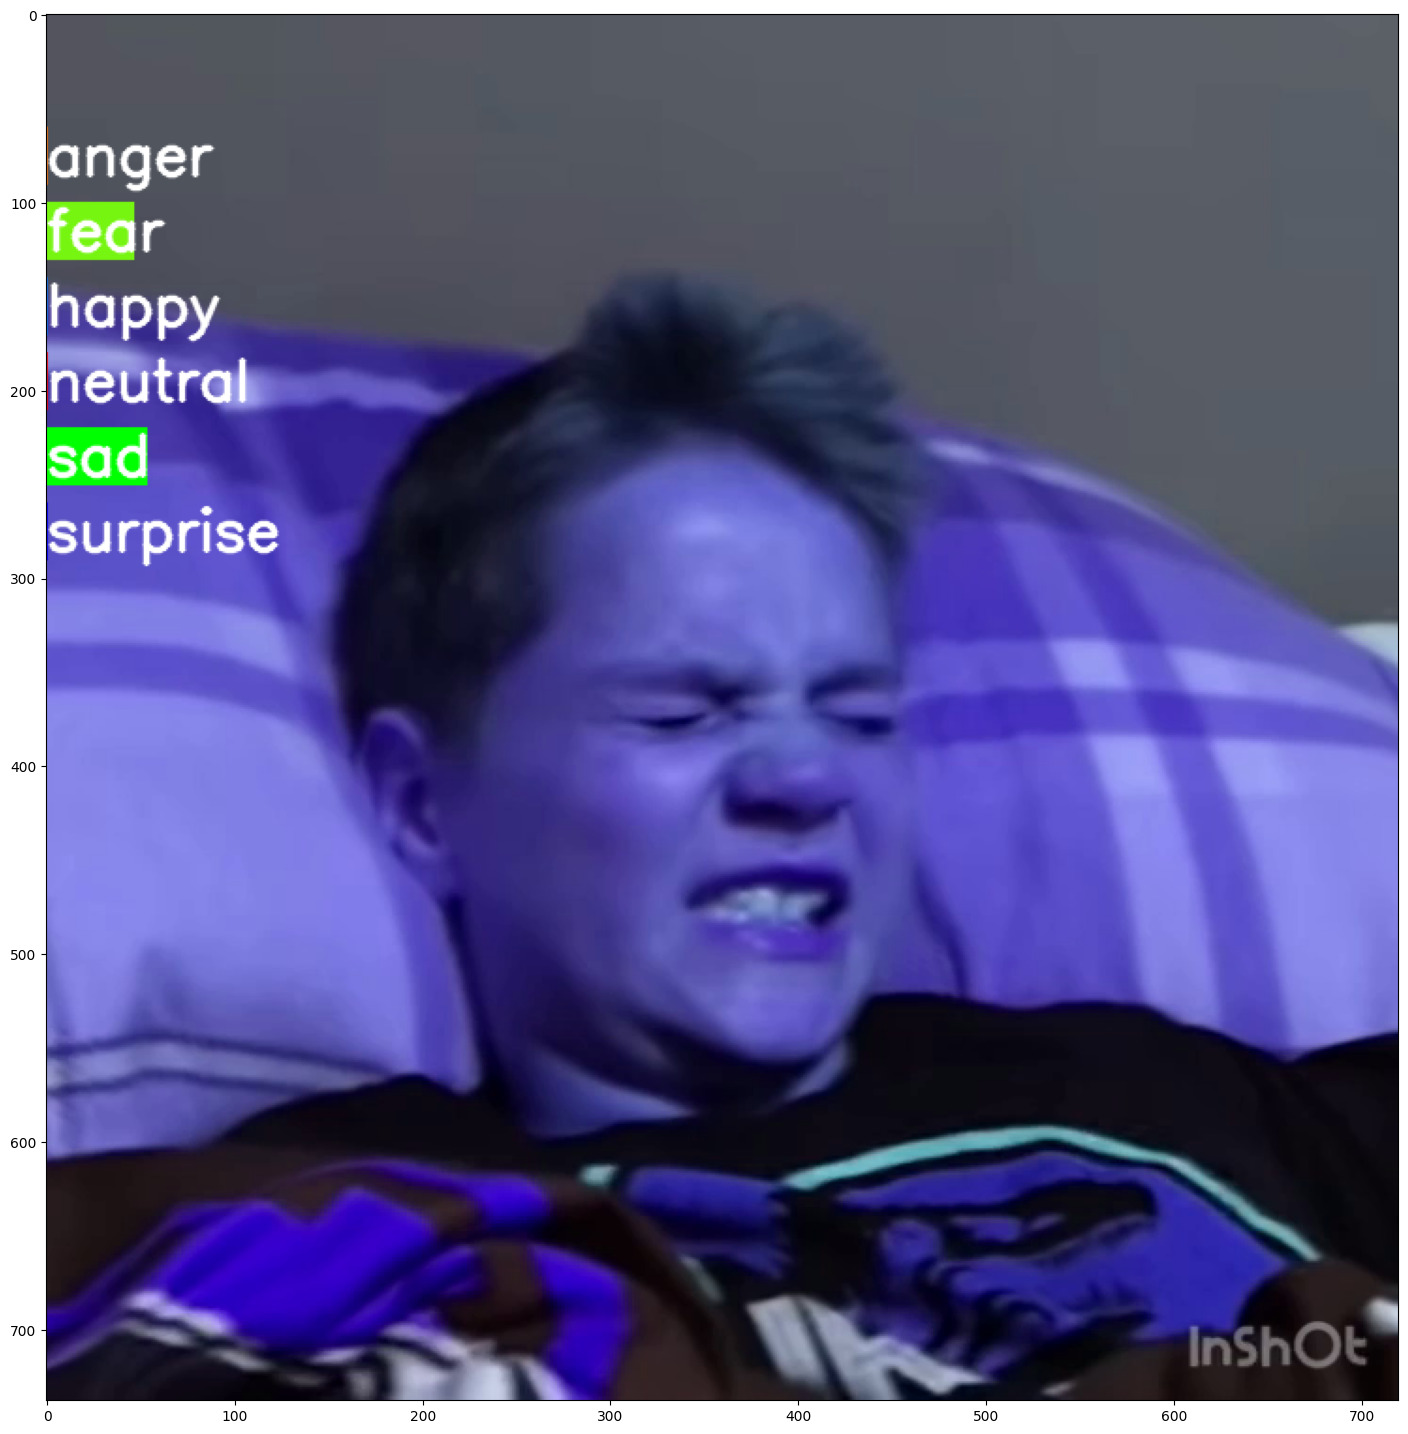

In [67]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res[2], actions, image, colors))

In [68]:
import tensorflow as tf

In [69]:
model = tf.keras.models.load_model("action.h5")

In [72]:
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture("happy19.mp4")
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()
        if not ret or frame is None:
            break

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(res)
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x000001398AE95D00>
Traceback (most recent call last):
  File "H:\PYTHON\PYTHON SYSTEM FILES\Lib\weakref.py", line 370, in remove
    self = selfref()
           ^^^^^^^^^
KeyboardInterrupt: 


<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
[0.05549068 0.04959671 0.45020202 0.00332826 0.1018042  0.3395781 ]
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
[0.05546278 0.0500449  0.44975638 0.00330703 0.10227486 0.33915406]
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
[0.05546072 0.05048387 0.4490969  0.0032976  0.10276515 0.3388958 ]
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 49ms/step
[0.05543565 0.05091625 0.44849053 0.00328458 0.10325296 0.33862004]
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 61ms/step
[0.05541622 0.05146141 0.44773802 0.00326966 0.10387191 0.3382428 ]
happy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [=======================

KeyboardInterrupt: 

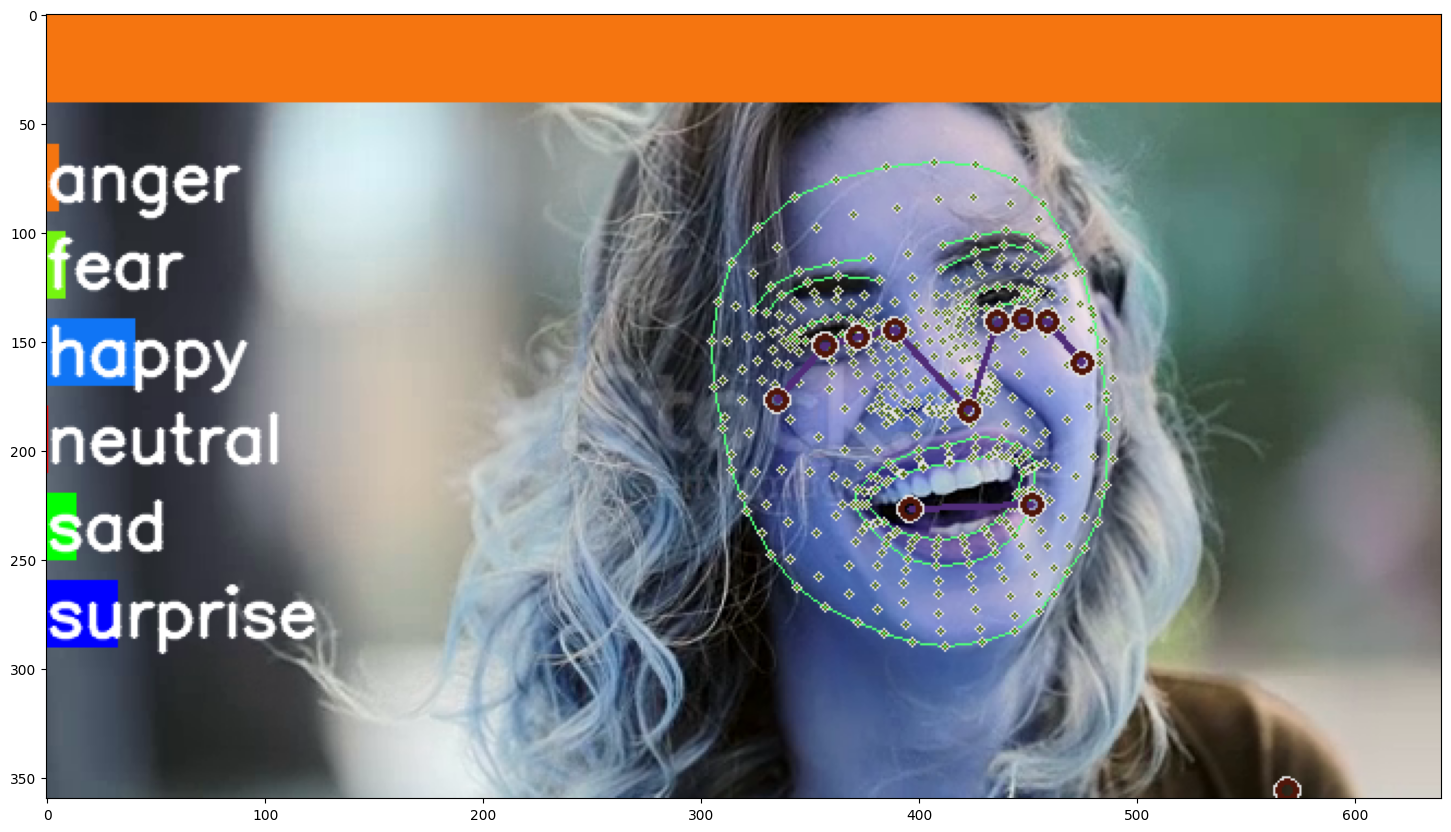

In [73]:
plt.figure(figsize=(18,18))
plt.imshow(image)

In [74]:
res

array([0.0540157 , 0.08040524, 0.4081225 , 0.00264285, 0.13197292,
       0.3228408 ], dtype=float32)

In [75]:
# history

In [80]:
import numpy as np


# Get the indices of the top 3 elements
top_indices = np.argsort(res)[-2:][::-1]

print("Indices of the top 3 elements:", top_indices)

Indices of the top 3 elements: [2 5]


In [81]:
ans=[]

In [82]:
for i in top_indices:
    ans.append(actions[i])

In [83]:
ans

['happy', 'surprise']